In [ ]:
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.simplefilter('ignore')

In [ ]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

### Read the dataset for churn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(os.path.exists("/content/drive/MyDrive/НУЛП АСУ /смарт-системи/Інформаційні технології Смарт систем/практичні  роботи/example/data/train.csv"))

True


In [ ]:
ds = pd.read_csv("/content/drive/MyDrive/НУЛП АСУ /смарт-системи/Інформаційні технології Смарт систем/практичні  роботи/example/data/train.csv")

In [ ]:
print('columns count - ',len(ds.columns), '\n')
print('columns: ',list(ds.columns))

columns count -  58 

columns:  ['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle', 'AdjustmentsToCreditRating', 'HandsetPrice

# Missing data imputation

In [ ]:
ds.shape

(51047, 58)

In [ ]:
missing = []

for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(x, ds[x].isnull().sum())
        missing.append(x)

MonthlyRevenue 156
MonthlyMinutes 156
TotalRecurringCharge 156
DirectorAssistedCalls 156
OverageMinutes 156
RoamingCalls 156
PercChangeMinutes 367
PercChangeRevenues 367
ServiceArea 24
Handsets 1
HandsetModels 1
CurrentEquipmentDays 1
AgeHH1 909
AgeHH2 909


In [ ]:
# let's make a function to fill missing values:
# the variable takes the dataframe, the variable, and the value for imputation
# and returns the variable with the filled na


def impute_na(df, variable, value):

    return df[variable].fillna(value)

#### Mean / Median imputation
Imputation is the act of replacing missing data with statistical estimates of the missing values. The goal of any imputation technique is to produce a complete dataset that can be used to train machine learning models.

Mean / median imputation consists of replacing all occurrences of missing values (NA) within a variable by the mean (if the variable has a Gaussian distribution) or median (if the variable has a skewed distribution).

In [ ]:

# let's make a function to fill missing values:
# the variable takes the dataframe, the variable, and the value for imputation
# and returns the variable with the filled na


def impute_na(df, variable, value):

    return df[variable].fillna(value)

In [ ]:

# calculate the median MonthlyRevenue

median = ds['MonthlyRevenue'].median()
median

48.46

In [ ]:
# calculate the median MonthlyMinutes

mean = ds['MonthlyMinutes'].mean()
mean

525.6534161246586

In [ ]:
# create a new variable with the missing values replaced
# using the function we created above

#  replace with the median
ds['MonthlyRevenue_median'] = impute_na(ds, 'MonthlyRevenue', median)

#  replace with the mean
ds['MonthlyMinutes_mean'] = impute_na(ds, 'MonthlyMinutes', mean)


ds.head(5)

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,MonthlyRevenue_median,MonthlyMinutes_mean
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No,24.00,219.0
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes,16.99,10.0
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes,38.00,8.0
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No,82.28,1312.0
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes,17.14,0.0


In [ ]:
# we can see a change in the variance after mean / median imputation
# this is expected, because the percentage of missing data is quite
# high in MonthlyRevenue

print('Original variable variance: ', ds['MonthlyRevenue'].var())
print('Variance after median imputation: ', ds['MonthlyRevenue_median'].var())


Original variable variance:  1980.9029269829
Variance after median imputation:  1975.1770743479394


#### Arbitrary value imputation

Arbitrary value imputation consists of replacing all occurrences of missing values (NA) within a variable by an arbitrary value. Typically used arbitrary values are 0, 999, -999 (or other combinations of 9s) or -1 (if the distribution is positive).

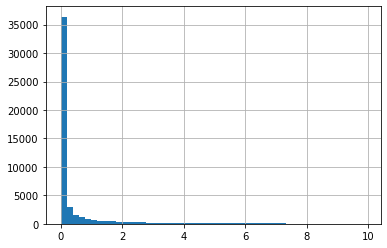

In [ ]:
# let's explore the distribution of the variables
# to decide which arbitrary value to use

ds[ds['RoamingCalls']<10]['RoamingCalls'].hist(bins=50)
plt.show()

In [ ]:
# For this demo I will replace NA by 2 different arbitrary values
# one at the far right end of the distribution ==> 0
# and alternatively by -1, taking advantage that RoamingCalls takes only positive values

# first replace with 0
ds['RoamingCalls_0'] = impute_na(ds, 'RoamingCalls', 0)

# first replace with -1
ds['RoamingCalls__minus1'] = impute_na(ds, 'RoamingCalls', 0)
ds.head(5)

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,MonthlyRevenue_median,MonthlyMinutes_mean,RoamingCalls_0,RoamingCalls__minus1
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No,24.00,219.0,0.0,0.0
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes,16.99,10.0,0.0,0.0
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes,38.00,8.0,0.0,0.0
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No,82.28,1312.0,0.0,0.0
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes,17.14,0.0,0.0,0.0


In [ ]:
# we can see a small change in the variance after arbitrary value imputation
# this is expected, because the percentage of missing data isn't high

print('Original variable variance: ', ds['RoamingCalls'].var())
print('Variance after 0 imputation: ', ds['RoamingCalls_0'].var())
print('Variance after -1 imputation: ', ds['RoamingCalls__minus1'].var())

Original variable variance:  96.39889325413506
Variance after 0 imputation:  96.10894808281333
Variance after -1 imputation:  96.10894808281333


#### End of distribution imputation
We replaced missing data by an arbitrary value. However, determining the value of the arbitrary value can be laborious and it is usually a manual job. We can automate this process by automatically selecting arbitrary values at the end of the variable distributions.

How do we select the value at the end?
If the variable is normally distributed, we can use the mean plus or minus 3 times the standard deviation
If the variable is skewed, we can use the IQR proximity rule
We learnt these techniques in section 3, in the lecture on "Outliers".

We can also select the min / max value and multiply it by a certain amount of times, like 2 or 3.


In [ ]:
# far end of the distribution:

# Because TotalRecurringCharge  looks approximately Gaussian, I use the
# mean and std to calculate the replacement value

ds['TotalRecurringCharge'].mean() + 3 * ds['TotalRecurringCharge'].std()

118.37669993760122

In [ ]:
# replace NA with the value calculated above

ds['TotalRecurringCharge_imputed'] = impute_na(ds, 'TotalRecurringCharge',
                                   ds['TotalRecurringCharge'].mean() + 3 * ds['TotalRecurringCharge'].std())

ds.head(5)

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,MonthlyRevenue_median,MonthlyMinutes_mean,RoamingCalls_0,RoamingCalls__minus1,TotalRecurringCharge_imputed
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No,24.00,219.0,0.0,0.0,22.0
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes,16.99,10.0,0.0,0.0,17.0
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes,38.00,8.0,0.0,0.0,38.0
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No,82.28,1312.0,0.0,0.0,75.0
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes,17.14,0.0,0.0,0.0,17.0


In [ ]:
# we can see a change in the variance after end of tail imputation

print('Original variable variance: ', ds['TotalRecurringCharge'].var())
print('Variance after imputation: ', ds['TotalRecurringCharge_imputed'].var())

Original variable variance:  568.7686337101077
Variance after imputation:  582.6263870455929


#### Frequent category imputation | Mode imputation
Mode imputation consists of replacing all occurrences of missing values (NA) within a variable by the mode, which in other words refers to the most frequent value or most frequent category.

Text(0, 0.5, 'Number of Handset')

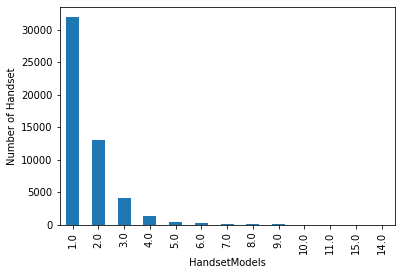

In [ ]:
# let's inspect the number of observations per category in HandsetModels



ds['HandsetModels'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('HandsetModels')
plt.ylabel('Number of Handset')

In [ ]:

# Let's find the most frequent category for HandsetModels

insert = ds['HandsetModels'].mode()

In [ ]:
# Let's fill na in dataset

# I use the fillna() method from pandas

# with the argument inplace=True, I indicate to pandas
# that I want the values replaced in the same dataset

ds['HandsetModels'].fillna(insert, inplace=True)


In [ ]:
ds.head(5)

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,MonthlyRevenue_median,MonthlyMinutes_mean,RoamingCalls_0,RoamingCalls__minus1,TotalRecurringCharge_imputed
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No,24.00,219.0,0.0,0.0,22.0
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes,16.99,10.0,0.0,0.0,17.0
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes,38.00,8.0,0.0,0.0,38.0
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No,82.28,1312.0,0.0,0.0,75.0
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes,17.14,0.0,0.0,0.0,17.0


In [ ]:
ds[ds['HandsetModels'].isnull()]['HandsetModels'].head()

38702   NaN
Name: HandsetModels, dtype: float64

#### Arbitrary value imputation for categorical variables
This is the most widely used method of missing data imputation for categorical variables. This method consists in treating missing data as an additional label or category of the variable. All the missing observations are grouped in the newly created label 'Missing'.

This is in essence, the equivalent of replacing by an arbitrary value for numerical variables.

The beauty of this technique resides on the fact that it does not assume anything about the fact that the data is missing. It is very well suited when the number of missing data is high.

In [ ]:
# let's remind ourselves of the % of missing values
ds['AgeHH1'].isnull().mean()

0.017807118929613886

In [ ]:
# Let's fill na

# I use the fillna() method from pandas

# with the argument inplace=True, I indicate to pandas
# that I want the values replaced in the same dataset

ds['AgeHH1'].fillna('Missing', inplace=True)

#### Random sample imputation
Random sampling imputation is in principle similar to mean / median / mode imputation, in the sense that it aims to preserve the statistical parameters of the original variable, for which data is missing.

Random sampling consist of taking a random observation from the pool of available observations of the variable, and using that randomly extracted value to fill the NA. In random sample imputation one takes as many random observations as missing values are present in the variable.

By random sampling observations of the variable for those instances where data is available, we guarantee that the mean and standard deviation of the variable are preserved.

By random sampling observations of the present categories, for categorical variables, we guarantee that the frequency of the different categories / labels within the variable is preserved.

In [ ]:
# let's impute PercChangeMinutes by random sampling

# create the new variable where NA will be imputed:
# make a copy from the original variable, with NA
ds['PercChangeMinutes_imputed'] = ds['PercChangeMinutes'].copy()

# extract the random sample to fill the na:
# remember we do this always from the train set, and we use
# these to fill both train and test

random_sample_train = ds['PercChangeMinutes'].dropna().sample(
    ds['PercChangeMinutes'].isnull().sum(), random_state=0)


# what is all of the above code doing?

# 1) dropna() removes the NA from the original variable, this
# means that I will randomly extract existing values and not NAs

# 2) sample() is the method that will do the random sampling

# 3) ds['PercChangeMinutes'].isnull().sum() is the number of random values to extract
# I want to extract as many values as NAs are present in the original variable

# 4) random_state sets the seed for reproducibility, so that I extract
# always the same random values, every time I run this notebook

# pandas needs to have the same index in order to merge datasets
random_sample_train.index = ds[ds['PercChangeMinutes'].isnull()].index

# replace the NA in the newly created variable
ds.loc[ds['PercChangeMinutes'].isnull(), 'PercChangeMinutes_imputed'] = random_sample_train


In [ ]:
# we can see a change in the variance after end of tail imputation

print('Original variable variance: ', ds['PercChangeMinutes'].var())
print('Variance after imputation: ', ds['PercChangeMinutes_imputed'].var())

Original variable variance:  66313.85796243603
Variance after imputation:  66320.4643599887


#### Adding a variable to capture NA

There are other methods that can be used when values are not missing at random, for example arbitrary value imputation or end of distribution imputation. However, these imputation techniques will affect the variable distribution dramatically, and are therefore not suitable for linear models.

In [ ]:
# let's make a function to add a missing indicator
# binary variable

def missing_indicator(df, variable):
    return np.where(df[variable].isnull(), 1, 0)

In [ ]:
# let's loop over all the variables and add a binary
# missing indicator with the function we created

cols_to_use = ['MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'ServiceArea',
 'Handsets',
 'CurrentEquipmentDays',
 'AgeHH2']

for variable in cols_to_use:
    ds[variable+'_NA'] = missing_indicator(ds, variable)

ds.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,MonthlyRevenue_median,MonthlyMinutes_mean,RoamingCalls_0,RoamingCalls__minus1,TotalRecurringCharge_imputed,PercChangeMinutes_imputed,MonthlyRevenue_NA,MonthlyMinutes_NA,TotalRecurringCharge_NA,DirectorAssistedCalls_NA,OverageMinutes_NA,RoamingCalls_NA,PercChangeMinutes_NA,PercChangeRevenues_NA,ServiceArea_NA,Handsets_NA,CurrentEquipmentDays_NA,AgeHH2_NA
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No,24.00,219.0,0.0,0.0,22.0,-157.0,0,0,0,0,0,0,0,0,0,0,0,0
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes,16.99,10.0,0.0,0.0,17.0,-4.0,0,0,0,0,0,0,0,0,0,0,0,0
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes,38.00,8.0,0.0,0.0,38.0,-2.0,0,0,0,0,0,0,0,0,0,0,0,0
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No,82.28,1312.0,0.0,0.0,75.0,157.0,0,0,0,0,0,0,0,0,0,0,0,0
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes,17.14,0.0,0.0,0.0,17.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0


# Categorical encoding

### One Hot Encoding
One hot encoding, consists in encoding each categorical variable with different boolean variables (also called dummy variables) which take values 0 or 1, indicating if a category is present in an observation.

For example, for the categorical variable "Gender", with labels 'female' and 'male', we can generate the boolean variable "female", which takes 1 if the person is 'female' or 0 otherwise, or we can generate the variable "male", which takes 1 if the person is 'male' and 0 otherwise.

For the categorical variable "colour" with values 'red', 'blue' and 'green', we can create 3 new variables called "red", "blue" and "green". These variables will take the value 1, if the observation is of the said colour or 0 otherwise.

In [ ]:
# for one hot encoding with sklearn
from sklearn.preprocessing import OneHotEncoder


In [ ]:
ds.nunique()

CustomerID                      51047
Churn                               2
MonthlyRevenue                  12665
MonthlyMinutes                   2719
TotalRecurringCharge              214
DirectorAssistedCalls             146
OverageMinutes                    746
RoamingCalls                      530
PercChangeMinutes                2262
PercChangeRevenues               2899
DroppedCalls                      285
BlockedCalls                      373
UnansweredCalls                   840
CustomerCareCalls                 185
ThreewayCalls                      78
ReceivedCalls                    6121
OutboundCalls                     787
InboundCalls                      472
PeakCallsInOut                   1839
OffPeakCallsInOut                1669
DroppedBlockedCalls               447
CallForwardingCalls                31
CallWaitingCalls                  223
MonthsInService                    56
UniqueSubs                         15
ActiveSubs                         12
ServiceArea 

##### Let's explore the cardinality

In [ ]:
# churn has 2 labels

ds['Churn'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
# MadeCallToRetentionTeam has 2 labels

ds['MadeCallToRetentionTeam'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
# MadeCallToRetentionTeam has 2 labels

ds['MadeCallToRetentionTeam'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
# CreditRating has 7 labels

ds['CreditRating'].unique()

array(['1-Highest', '4-Medium', '3-Good', '6-VeryLow', '2-High', '5-Low',
       '7-Lowest'], dtype=object)

In [ ]:
# Occupation has 8 labels

ds['Occupation'].unique()

array(['Professional', 'Crafts', 'Other', 'Self', 'Retired', 'Homemaker',
       'Clerical', 'Student'], dtype=object)


The pandas method get_dummies(), will create as many binary variables as categories in the variable:

If the variable colour has 3 categories in the train data, it will create 2 dummy variables. However, if the variable colour has 5 categories in the test data, it will create 4 binary variables, therefore train and test sets will end up with different number of features and will be incompatible with training and scoring using Scikit-learn.

In practice, we shouldn't be using get-dummies in our machine learning pipelines. It is however useful, for a quick data exploration. Let's look at this with examples.


In [ ]:
# we can create dummy variables with the build in
# pandas method get_dummies

tmp = pd.get_dummies(ds['Churn'])

tmp.head()

,No,Yes
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [ ]:
# obtaining k-1 labels: we need to indicate get_dummies
# to drop the first binary variable

tmp = pd.get_dummies(ds['Churn'], drop_first=True)

tmp.head()

,Yes
0,1
1,1
2,0
3,0
4,1


#### One hot encoding with Scikit-learn

In [ ]:
# we create and train the encoder

encoder = OneHotEncoder(categories='auto',
                       drop='first', # to return k-1, use drop=false to return k dummies
                       sparse=False,
                       handle_unknown='error') # helps deal with rare labels

encoder.fit(ds[['CreditRating','Occupation']].fillna('Missing'))

OneHotEncoder(drop='first', sparse=False, sparse_output=False)

In [ ]:
# we observe the learned categories

encoder.categories_

[array(['1-Highest', '2-High', '3-Good', '4-Medium', '5-Low', '6-VeryLow',
        '7-Lowest'], dtype=object),
 array(['Clerical', 'Crafts', 'Homemaker', 'Other', 'Professional',
        'Retired', 'Self', 'Student'], dtype=object)]

In [ ]:
# transform the train set

tmp = encoder.transform(ds[['CreditRating','Occupation']].fillna('Missing'))

pd.DataFrame(tmp).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:

# NEW: in latest release of Scikit-learn
# we can now retrieve the feature names as follows:

encoder.get_feature_names_out()

array(['CreditRating_2-High', 'CreditRating_3-Good',
       'CreditRating_4-Medium', 'CreditRating_5-Low',
       'CreditRating_6-VeryLow', 'CreditRating_7-Lowest',
       'Occupation_Crafts', 'Occupation_Homemaker', 'Occupation_Other',
       'Occupation_Professional', 'Occupation_Retired', 'Occupation_Self',
       'Occupation_Student'], dtype=object)

In [ ]:
# we can go ahead and transfom the test set
# and then reconstitute it back to a pandas dataframe
# and add the feature names derived by OHE

tmp = encoder.transform(ds[['CreditRating','Occupation']].fillna('Missing'))

tmp = pd.DataFrame(tmp)
tmp.columns = encoder.get_feature_names_out()

tmp.head()

,CreditRating_2-High,CreditRating_3-Good,CreditRating_4-Medium,CreditRating_5-Low,CreditRating_6-VeryLow,CreditRating_7-Lowest,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### In order to avoid these complications, we can create dummy variables only for the most frequent categories

This procedure is also called one hot encoding of top categories.

In [ ]:
# let's find the top 10 most frequent categories for the variable 'ServiceArea'

ds['ServiceArea'].value_counts().sort_values(ascending=False).head(10)

NYCBRO917    1684
HOUHOU281    1510
DALDAL214    1498
NYCMAN917    1182
APCFCH703     783
DALFTW817     782
SANSAN210     724
APCSIL301     670
SANAUS512     612
SFROAK510     605
Name: ServiceArea, dtype: int64

In [ ]:
# let's make a list with the most frequent categories of the variable

top_10 = [
    x for x in ds['ServiceArea'].value_counts().sort_values(
        ascending=False).head(10).index
]

top_10

['NYCBRO917',
 'HOUHOU281',
 'DALDAL214',
 'NYCMAN917',
 'APCFCH703',
 'DALFTW817',
 'SANSAN210',
 'APCSIL301',
 'SANAUS512',
 'SFROAK510']

In [ ]:
# and now we make the 10 binary variables

for label in top_10:
    ds['ServiceArea' + '_' + label] = np.where(
        ds['ServiceArea'] == label, 1, 0)


# let's visualise the result
ds[['ServiceArea'] + ['ServiceArea'+'_'+c for c in top_10]].head(10)

,ServiceArea,ServiceArea_NYCBRO917,ServiceArea_HOUHOU281,ServiceArea_DALDAL214,ServiceArea_NYCMAN917,ServiceArea_APCFCH703,ServiceArea_DALFTW817,ServiceArea_SANSAN210,ServiceArea_APCSIL301,ServiceArea_SANAUS512,ServiceArea_SFROAK510
0,SEAPOR503,0,0,0,0,0,0,0,0,0,0
1,PITHOM412,0,0,0,0,0,0,0,0,0,0
2,MILMIL414,0,0,0,0,0,0,0,0,0,0
3,PITHOM412,0,0,0,0,0,0,0,0,0,0
4,OKCTUL918,0,0,0,0,0,0,0,0,0,0
5,OKCTUL918,0,0,0,0,0,0,0,0,0,0
6,OKCTUL918,0,0,0,0,0,0,0,0,0,0
7,OKCOKC405,0,0,0,0,0,0,0,0,0,0
8,SANMCA210,0,0,0,0,0,0,0,0,0,0
9,PITHOM412,0,0,0,0,0,0,0,0,0,0


In [ ]:
# we can turn the previous commands into 2 functions


def calculate_top_categories(df, variable, how_many=10):
    return [
        x for x in df[variable].value_counts().sort_values(
            ascending=False).head(how_many).index
    ]


def one_hot_encode(train, variable, top_x_labels):

    for label in top_x_labels:
        train[variable + '_' + label] = np.where(
            train[variable] == label, 1, 0)


In [ ]:
# and now we run a loop over the remaining categorical variables

top_categories = calculate_top_categories(ds, 'ServiceArea', how_many=10)

one_hot_encode(ds, 'ServiceArea', top_categories)

In [ ]:
ds.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,MonthlyRevenue_median,MonthlyMinutes_mean,RoamingCalls_0,RoamingCalls__minus1,TotalRecurringCharge_imputed,PercChangeMinutes_imputed,MonthlyRevenue_NA,MonthlyMinutes_NA,TotalRecurringCharge_NA,DirectorAssistedCalls_NA,OverageMinutes_NA,RoamingCalls_NA,PercChangeMinutes_NA,PercChangeRevenues_NA,ServiceArea_NA,Handsets_NA,CurrentEquipmentDays_NA,AgeHH2_NA,ServiceArea_NYCBRO917,ServiceArea_HOUHOU281,ServiceArea_DALDAL214,ServiceArea_NYCMAN917,ServiceArea_APCFCH703,ServiceArea_DALFTW817,ServiceArea_SANSAN210,ServiceArea_APCSIL301,ServiceArea_SANAUS512,ServiceArea_SFROAK510
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No,24.00,219.0,0.0,0.0,22.0,-157.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes,16.99,10.0,0.0,0.0,17.0,-4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes,38.00,8.0,0.0,0.0,38.0,-2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No,82.28,1312.0,0.0,0.0,75.0,157.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes,17.14,0.0,0.0,0.0,17.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Integer Encoding
Integer encoding consist in replacing the categories by digits from 1 to n (or 0 to n-1, depending the implementation), where n is the number of distinct categories of the variable.

The numbers are assigned arbitrarily. This encoding method allows for quick benchmarking of machine learning models.

In [ ]:
# let's explore the unique categories
ds['Occupation'].unique()

array(['Professional', 'Crafts', 'Other', 'Self', 'Retired', 'Homemaker',
       'Clerical', 'Student'], dtype=object)

In [ ]:
# first let's create a dictionary with the mappings of categories to numbers

ordinal_mapping = {
    k: i
    for i, k in enumerate(ds['Occupation'].unique(), 0)
}

ordinal_mapping

{'Professional': 0,
 'Crafts': 1,
 'Other': 2,
 'Self': 3,
 'Retired': 4,
 'Homemaker': 5,
 'Clerical': 6,
 'Student': 7}

In [ ]:
# replace the labels with the integers

ds['Occupation'] = ds['Occupation'].map(ordinal_mapping)

In [ ]:
ds['Occupation'].head()

0    0
1    0
2    1
3    2
4    0
Name: Occupation, dtype: int64

In [ ]:
# we can turn the previous commands into 2 functions


def find_category_mappings(df, variable):
    return {k: i for i, k in enumerate(df[variable].unique(), 0)}


def integer_encode(train, variable, ordinal_mapping):

    train[variable] = train[variable].map(ordinal_mapping)


In [ ]:
# and now we run a loop over the remaining categorical variables

for variable in ['MaritalStatus', 'Handsets','Churn']:
    mappings = find_category_mappings(ds, variable)
    integer_encode(ds, variable, mappings)

In [ ]:
ds[['MaritalStatus', 'Handsets','Churn']].head()

,MaritalStatus,Handsets,Churn
0,0,0,0
1,1,0,0
2,1,1,1
3,0,2,1
4,1,3,0


#### Ordered Integer Encoding
Ordering the categories according to the target means assigning a number to the category from 1 to k, where k is the number of distinct categories in the variable, but this numbering is informed by the mean of the target for each category.

For example, we have the variable city with values London, Manchester and Bristol; if the default rate is 30% in London, 20% in Bristol and 10% in Manchester, then we replace London by 1, Bristol by 2 and Manchester by 3.

In [ ]:
# let's explore the unique categories
ds['CreditRating'].unique()

array(['1-Highest', '4-Medium', '3-Good', '6-VeryLow', '2-High', '5-Low',
       '7-Lowest'], dtype=object)

In [ ]:
# let's order the labels according to the mean target value

ds.groupby(['CreditRating'])['Churn'].mean().sort_values()

CreditRating
3-Good       0.689893
1-Highest    0.691622
2-High       0.699258
7-Lowest     0.710501
6-VeryLow    0.725694
4-Medium     0.738846
5-Low        0.779043
Name: Churn, dtype: float64

In the above cell, we ordered the categories from the CreditRating where the churn rate are lower, to the CreditRating where the churn percentage are, on average, higher.

In the next cells, we will replace those categories, ordered as they are, by the numbers 0 to k, where k is the number of different categories minus 1, in this case 7 - 1 = 6.

So 3-Good will be replaced by 0 and 5-Low by 6, just to be clear.

In [ ]:
# first  we generate an ordered list with the labels

ordered_labels = ds.groupby(['CreditRating'
                                  ])['Churn'].mean().sort_values().index

ordered_labels

Index(['3-Good', '1-Highest', '2-High', '7-Lowest', '6-VeryLow', '4-Medium',
       '5-Low'],
      dtype='object', name='CreditRating')

In [ ]:
# next let's create a dictionary with the mappings of categories to numbers

ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 0)}

ordinal_mapping

{'3-Good': 0,
 '1-Highest': 1,
 '2-High': 2,
 '7-Lowest': 3,
 '6-VeryLow': 4,
 '4-Medium': 5,
 '5-Low': 6}

In [ ]:
ds['CreditRating'] = ds['CreditRating'].map(ordinal_mapping)

In [ ]:
# we can turn the previous commands into 2 functions


def find_category_mappings(df, variable, target):

    # first  we generate an ordered list with the labels
    ordered_labels = df.groupby([variable
                                 ])[target].mean().sort_values().index

    # return the dictionary with mappings
    return {k: i for i, k in enumerate(ordered_labels, 0)}


def integer_encode(train, variable, ordinal_mapping):

    train[variable] = train[variable].map(ordinal_mapping)

In [ ]:
# and now we run a loop over the remaining categorical variables

for variable in ['PrizmCode', 'RetentionOffersAccepted']:

    mappings = find_category_mappings(ds, variable, 'Churn')

    integer_encode(ds, variable, mappings)

#### Count or frequency encoding
In count encoding we replace the categories by the count of the observations that show that category in the dataset. Similarly, we can replace the category by the frequency -or percentage- of observations in the dataset. That is, if 10 of our 100 observations show the colour blue, we would replace blue by 10 if doing count encoding, or by 0.1 if replacing by the frequency. These techniques capture the representation of each label in a dataset, but the encoding may not necessarily be predictive of the outcome. These are however, very popular encoding methods in Kaggle competitions.

The assumption of this technique is that the number observations shown by each variable is somewhat informative of the predictive power of the category.



In [ ]:
# let's obtain the counts for each one of the labels
# in the variable Neigbourhood

count_map = ds['ServiceArea'].value_counts().to_dict()

count_map

{'NYCBRO917': 1684,
 'HOUHOU281': 1510,
 'DALDAL214': 1498,
 'NYCMAN917': 1182,
 'APCFCH703': 783,
 'DALFTW817': 782,
 'SANSAN210': 724,
 'APCSIL301': 670,
 'SANAUS512': 612,
 'SFROAK510': 605,
 'SFRSFR415': 565,
 'NYCQUE917': 533,
 'ATLANE678': 524,
 'PHXPHX602': 512,
 'SFRSCL408': 508,
 'ATLATL678': 507,
 'STLSTL314': 497,
 'OHICOL614': 486,
 'MINMIN612': 481,
 'NEVLVS702': 479,
 'BOSBOS617': 474,
 'CHINBK847': 472,
 'MIAMIA305': 471,
 'SANMCA210': 452,
 'CHICHI773': 441,
 'INDIND317': 420,
 'APCBAL410': 419,
 'NYCNEW201': 410,
 'LAXANA714': 403,
 'NYCNAS516': 399,
 'KCYKCM816': 396,
 'NSHNSH615': 383,
 'PHIPHI215': 373,
 'DETDET313': 368,
 'NOLKEN504': 360,
 'DENDEN303': 359,
 'MILMIL414': 357,
 'NEVSDG619': 357,
 'APCWAS202': 342,
 'KCYKCK913': 342,
 'NYCSUF516': 332,
 'SEASEA206': 325,
 'DETPON248': 312,
 'HARHAR860': 303,
 'CHILAG630': 293,
 'NYCNEW973': 277,
 'NNYBUF716': 273,
 'FLNORL407': 266,
 'NYCWHI914': 266,
 'MIAFTL954': 251,
 'OHICIN513': 250,
 'MINSTP612': 244,
 'LAXCDG

In [ ]:
ds

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,MonthlyRevenue_median,MonthlyMinutes_mean,RoamingCalls_0,RoamingCalls__minus1,TotalRecurringCharge_imputed,PercChangeMinutes_imputed,MonthlyRevenue_NA,MonthlyMinutes_NA,TotalRecurringCharge_NA,DirectorAssistedCalls_NA,OverageMinutes_NA,RoamingCalls_NA,PercChangeMinutes_NA,PercChangeRevenues_NA,ServiceArea_NA,Handsets_NA,CurrentEquipmentDays_NA,AgeHH2_NA,ServiceArea_NYCBRO917,ServiceArea_HOUHOU281,ServiceArea_DALDAL214,ServiceArea_NYCMAN917,ServiceArea_APCFCH703,ServiceArea_DALFTW817,ServiceArea_SANSAN210,ServiceArea_APCSIL301,ServiceArea_SANAUS512,ServiceArea_SFROAK510
0,3000002,0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,3,No,No,0,4,No,0,30,Yes,1,3,0,0,24.00,219.000000,0.0,0.0,22.0000,-157.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3000010,0,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,3,Yes,No,0,5,No,0,30,No,5,3,0,1,16.99,10.000000,0.0,0.0,17.0000,-4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3000014,1,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,3,Yes,No,0,6,No,0,Unknown,No,0,1,1,1,38.00,8.000000,0.0,0.0,38.0000,-2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3000022,1,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,2,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,3,Yes,No,0,6,No,0,10,No,5,2,2,0,82.28,1312.000000,0.0,0.0,75.0000,157.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3000026,0,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,3,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,3,No,Yes,0,9,No,1,10,No,1,2,0,1,17.14,0.000000,0.0,0.0,17.0000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29,1,1,LAXSFN818,0,2.0,526.0,68.0,64.0,No,Yes,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,3,No,No,0,6,No,0,60,No,1,3,2,1,48.46,525.653416,0.0,0.0,118.3767,325.0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51043,3399974,1,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,16.7,0.7,41.3,0.0,0.0,681.5,89.7,33.3,318.7,248.3,17.3,0.0,14.3,29,1,1,LAXCDG310,0,2.0,464.0,48.0,48.0,Yes,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,3,No,No,0,9,No,1,60,No,0,2,2,0,95.17,1745.000000,4.7,4.7,85.0000,122.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51044,3399978,0,NaN,NaN,NaN,NaN,N

In [ ]:
# replace the labels with the counts
ds_copy = ds.copy()

ds_copy['ServiceArea'] = ds['ServiceArea'].map(count_map)

In [ ]:
ds_copy['ServiceArea'].head()

0    167.0
1    180.0
2    357.0
3    180.0
4    116.0
Name: ServiceArea, dtype: float64

In [ ]:
# if instead of the count we would like the frequency
# we need only divide the count by the total number of observations:

frequency_map = (ds['ServiceArea'].value_counts() / len(ds) ).to_dict()
frequency_map

{'NYCBRO917': 0.03298920602581934,
 'HOUHOU281': 0.0295805826003487,
 'DALDAL214': 0.029345505122730032,
 'NYCMAN917': 0.023155131545438516,
 'APCFCH703': 0.015338805414617901,
 'DALFTW817': 0.015319215624816345,
 'SANSAN210': 0.014183007816326131,
 'APCSIL301': 0.013125159167042138,
 'SANAUS512': 0.011988951358551922,
 'SFROAK510': 0.011851822829941034,
 'SFRSFR415': 0.011068231237878817,
 'NYCQUE917': 0.010441357964229044,
 'ATLANE678': 0.010265049856015045,
 'PHXPHX602': 0.01002997237839638,
 'SFRSCL408': 0.009951613219190159,
 'ATLATL678': 0.009932023429388603,
 'STLSTL314': 0.009736125531373048,
 'OHICOL614': 0.009520637843555939,
 'MINMIN612': 0.009422688894548161,
 'NEVLVS702': 0.009383509314945051,
 'BOSBOS617': 0.009285560365937274,
 'CHINBK847': 0.009246380786334163,
 'MIAMIA305': 0.009226790996532607,
 'SANMCA210': 0.008854584990303054,
 'CHICHI773': 0.008639097302485944,
 'INDIND317': 0.00822771171665328,
 'APCBAL410': 0.008208121926851724,
 'NYCNEW201': 0.00803181381863772

In [ ]:
ds_copy['ServiceArea'] = ds['ServiceArea'].map(frequency_map)

In [ ]:
ds_copy['ServiceArea'].head()

0    0.003271
1    0.003526
2    0.006994
3    0.003526
4    0.002272
Name: ServiceArea, dtype: float64

## Outlier Engineering

An outlier is a data point which is significantly different from the remaining data. “An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism.” [D. Hawkins. Identification of Outliers, Chapman and Hall , 1980].

In [ ]:
import seaborn as sns

# for Q-Q plots
import scipy.stats as stats

In [ ]:
# function to create histogram, Q-Q plot and


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

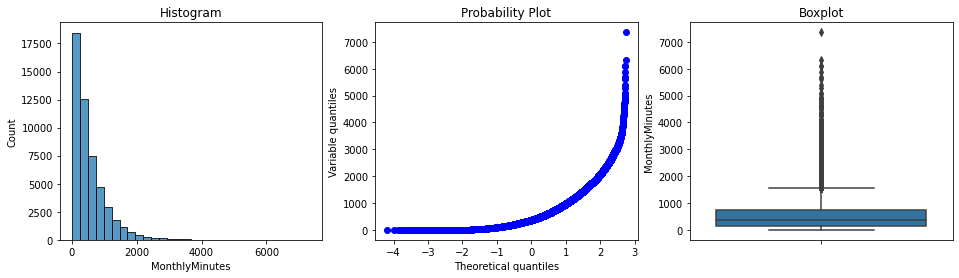

In [ ]:
# let's find outliers in MonthlyMinutes

diagnostic_plots(ds, 'MonthlyMinutes')

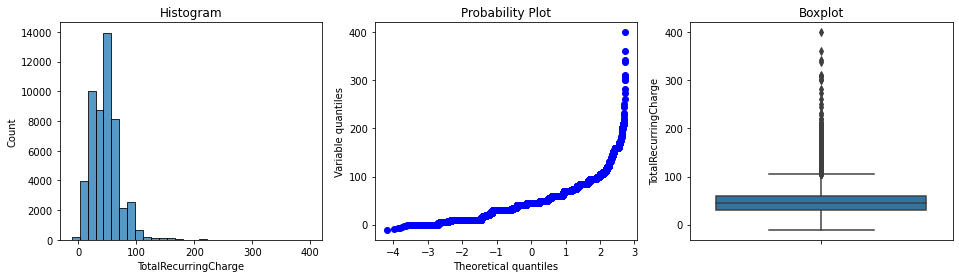

In [ ]:
# let's find outliers in TotalRecurringCharge

diagnostic_plots(ds, 'TotalRecurringCharge')

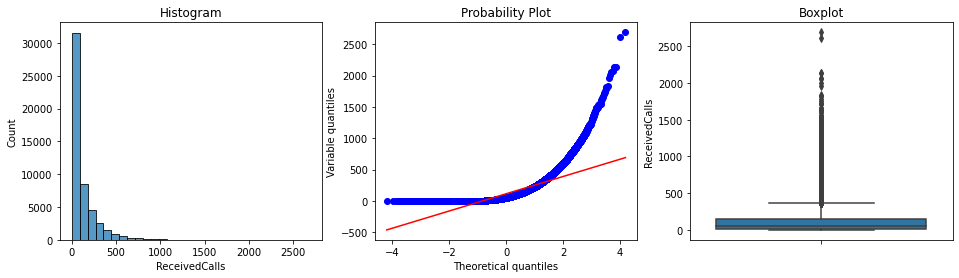

In [ ]:
# let's find outliers in ReceivedCalls

diagnostic_plots(ds, 'ReceivedCalls')

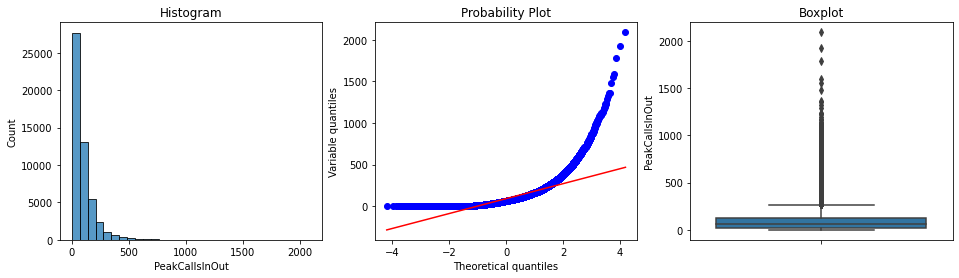

In [ ]:
# let's find outliers in PeakCallsInOut

diagnostic_plots(ds, 'PeakCallsInOut')

In [ ]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [ ]:
# find limits for PeakCallsInOut

PeakCallsInOut_upper_limit, PeakCallsInOut_lower_limit = find_skewed_boundaries(ds, 'PeakCallsInOut', 4)
PeakCallsInOut_upper_limit, PeakCallsInOut_lower_limit

(514.5, -370.2)

In [ ]:
# find limits for TotalRecurringCharge

TotalRecurringCharge_upper_limit, TotalRecurringCharge_lower_limit = find_skewed_boundaries(ds, 'TotalRecurringCharge', 4)
TotalRecurringCharge_upper_limit, TotalRecurringCharge_lower_limit

(180.0, -90.0)

In [ ]:
# let's flag the outliers in the data set

outliers_TotalRecurringCharge = np.where(ds['TotalRecurringCharge'] > TotalRecurringCharge_upper_limit, True,
                       np.where(ds['TotalRecurringCharge'] < TotalRecurringCharge_lower_limit, True, False))

In [ ]:
# let's trimm the dataset

ds_trimmed = ds.loc[~outliers_TotalRecurringCharge, ]

ds.shape, ds_trimmed.shape

((51047, 86), (50979, 86))

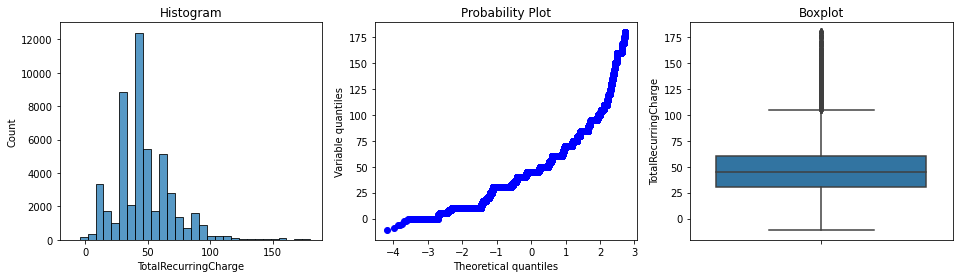

In [ ]:
# let's explore outliers in the trimmed dataset
# for TotalRecurringCharge we see much less outliers as in the original dataset

diagnostic_plots(ds_trimmed, 'TotalRecurringCharge')

### TotalRecurringCharge

#### Standardisation
Standardisation involves centering the variable at zero, and standardising the variance to 1. The procedure involves subtracting the mean of each observation and then dividing by the standard deviation:

z = (x - x_mean) / std

The result of the above transformation is z, which is called the z-score, and represents how many standard deviations a given observation deviates from the mean. A z-score specifies the location of the observation within a distribution (in numbers of standard deviations respect to the mean of the distribution). The sign of the z-score (+ or - ) indicates whether the observation is above (+) or below ( - ) the mean.

The shape of a standardised (or z-scored normalised) distribution will be identical to the original distribution of the variable. If the original distribution is normal, then the standardised distribution will be normal. But, if the original distribution is skewed, then the standardised distribution of the variable will also be skewed. In other words, standardising a variable does not normalize the distribution of the data and if this is the desired outcome, we should implement any of the techniques discussed in section 7 of the course.


In [ ]:
# the scaler - for standardisation
from sklearn.preprocessing import StandardScaler

In [ ]:
# let's have a look at the main statistical parameters of the variables
# to get an idea of the feature magnitudes

ds.describe()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,CreditRating,PrizmCode,Occupation,MaritalStatus,MonthlyRevenue_median,MonthlyMinutes_mean,RoamingCalls_0,RoamingCalls__minus1,TotalRecurringCharge_imputed,PercChangeMinutes_imputed,MonthlyRevenue_NA,MonthlyMinutes_NA,TotalRecurringCharge_NA,DirectorAssistedCalls_NA,OverageMinutes_NA,RoamingCalls_NA,PercChangeMinutes_NA,PercChangeRevenues_NA,ServiceArea_NA,Handsets_NA,CurrentEquipmentDays_NA,AgeHH2_NA,ServiceArea_NYCBRO917,ServiceArea_HOUHOU281,ServiceArea_DALDAL214,ServiceArea_NYCMAN917,ServiceArea_APCFCH703,ServiceArea_DALFTW817,ServiceArea_SANSAN210,ServiceArea_APCSIL301,ServiceArea_SANAUS512,ServiceArea_SFROAK510
count,5.104700e+04,51047.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51046.000000,51046.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,3.201957e+06,0.711815,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,4.085672,28.288981,1.868999,0.298838,114.800121,25.377715,8.178104,90.549515,67.650790,10.158003,0.012277,1.840504,18.756264,1.532157,1.354340,1.417380,1.558751,380.545841,21.144142,0.037201,2.964934,0.052070,4.324524,0.053911,2.414187,2.077164,1.796971,1.137207,58.802788,525.653416,1.232466,1.232466,47.048735,-11.559386,0.003056,0.003056,0.003056,0.003056,0.003056,0.003056,0.007189,0.007189,0.000470,0.000020,0.000020,0.017807,0.032989,0.029581,0.029346,0.023155,0.015339,0.015319,0.014183,0.013125,0.011989,0.011852
std,1.169056e+05,0.452922,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,10.946905,38.876194,5.096138,1.168277,166.485896,35.209147,16.665878,104.947470,92.752699,15.555284,0.594168,5.585129,9.800138,1.223384,0.675477,1.804588,0.905932,253.801982,23.931368,0.206483,0.266200,0.307592,3.138236,0.383147,1.941045,0.808448,1.128084,0.784740,44.442964,529.060783,9.803517,9.803517,24.137655,257.527599,0.055197,0.055197,0.055197,0.055197,0.055197,0.055197,0.084486,0.084486,0.021678,0.004426,0.004426,0.132251,0.178610,0.169429,0.168775,0.150398,0.122898,0.122820,0.118246,0.113812,0.108837,0.108220
min,3.000002e+06,0.000000,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,0.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.170000,0.000000,0.000000,0.000000,-11.000000,-3875.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100632e+06,0.000000,33.610000,158.0

In [ ]:
# standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(ds[['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge']])

# transform train and test sets
ds_scaled = scaler.transform(ds[['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge']])

In [ ]:
# the scaler stores the mean of the features, learned from train set

scaler.mean_

array([ 58.83449235, 525.65341612,  46.83008783])

In [ ]:
# the scaler stores the standard deviation deviation of the features,
# learned from train set

scaler.scale_

array([ 44.50689837, 529.86585687,  23.84863639])

In [ ]:
# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo

ds_scaled = pd.DataFrame(ds_scaled, columns=['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge'])

In [ ]:
# let's have a look at the scaled training dataset: mean and standard deviation
# I use np.round to reduce the number of decimals to 1.

np.round(ds_scaled.describe(), 1)

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge
count,50891.0,50891.0,50891.0
mean,-0.0,-0.0,0.0
std,1.0,1.0,1.0
min,-1.5,-1.0,-2.4
25%,-0.6,-0.7,-0.7
50%,-0.2,-0.3,-0.1
75%,0.3,0.4,0.6
max,26.2,12.9,14.8


#### Scaling to Minimum and Maximum values - MinMaxScaling
Minimum and maximum scaling squeezes the values between 0 and 1. It subtracts the minimum value from all the observations, and then divides it by the value range:

X_scaled = (X - X.min / (X.max - X.min)

The result of the above transformation is a distribution which values vary within the range of 0 to 1. But the mean is not centered at zero and the standard deviation varies across variables. The shape of a min-max scaled distribution will be similar to the original variable, but the variance may change, so not identical. This scaling technique is also sensitive to outliers.

This technique will not normalize the distribution of the data thus if this is the desired outcome, we should implement any of the techniques discussed in section 7 of the course.

In [ ]:
# the scaler - for min-max scaling
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# let's have a look at the main statistical parameters of the variables
# to get an idea of the feature magnitudes

ds[['OverageMinutes','PercChangeMinutes', 'RoamingCalls', 'DroppedCalls']].describe()

,OverageMinutes,PercChangeMinutes,RoamingCalls,DroppedCalls
count,50891.000000,50680.000000,50891.000000,51047.000000
mean,40.027785,-11.547908,1.236244,6.011489
std,96.588076,257.514772,9.818294,9.043955
min,0.000000,-3875.000000,0.000000,0.000000
25%,0.000000,-83.000000,0.000000,0.700000
50%,3.000000,-5.000000,0.000000,3.000000
75%,41.000000,66.000000,0.300000,7.700000
max,4321.000000,5192.000000,1112.400000,221.700000


In [ ]:
# set up the scaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(ds[['OverageMinutes','PercChangeMinutes', 'RoamingCalls', 'DroppedCalls']])

# transform train and test sets
X_train_scaled = scaler.transform(ds[['OverageMinutes','PercChangeMinutes', 'RoamingCalls', 'DroppedCalls']])

In [ ]:
# the scaler stores the maximum values of the features, learned from train set
scaler.data_max_

array([4321. , 5192. , 1112.4,  221.7])

In [ ]:
# tthe scaler stores the minimum values of the features, learned from train set
scaler.min_

array([0.        , 0.42737399, 0.        , 0.        ])

In [ ]:
# the scaler also stores the value range (max -  min)

scaler.data_range_

array([4321. , 9067. , 1112.4,  221.7])

In [ ]:
# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo
X_train = ds[['OverageMinutes','PercChangeMinutes', 'RoamingCalls', 'DroppedCalls']]
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [ ]:
# let's have a look at the original training dataset: min and max values
# I use np.round to reduce the number of decimals to 1.

np.round(X_train_scaled.describe(), 1)

,OverageMinutes,PercChangeMinutes,RoamingCalls,DroppedCalls
count,50891.0,50680.0,50891.0,51047.0
mean,0.0,0.4,0.0,0.0
std,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0
25%,0.0,0.4,0.0,0.0
50%,0.0,0.4,0.0,0.0
75%,0.0,0.4,0.0,0.0
max,1.0,1.0,1.0,1.0
